# Randomization Procedure

In this file, I draw all random values which we need when conducting the experiment. 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from bargain_live.bargaining_functions import create_participant_data, create_group_matrices_for_all_rounds, draw_termination_times
from pathlib import Path
import pickle
import os
# Set the random seed for reproducibility

current_dir = Path(os.getcwd())

In [2]:
termination_times_low_prob = draw_termination_times(number_of_rounds=30, probability_of_termination=0.01)
termination_times_high_prob = draw_termination_times(number_of_rounds=30, probability_of_termination=0.04)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

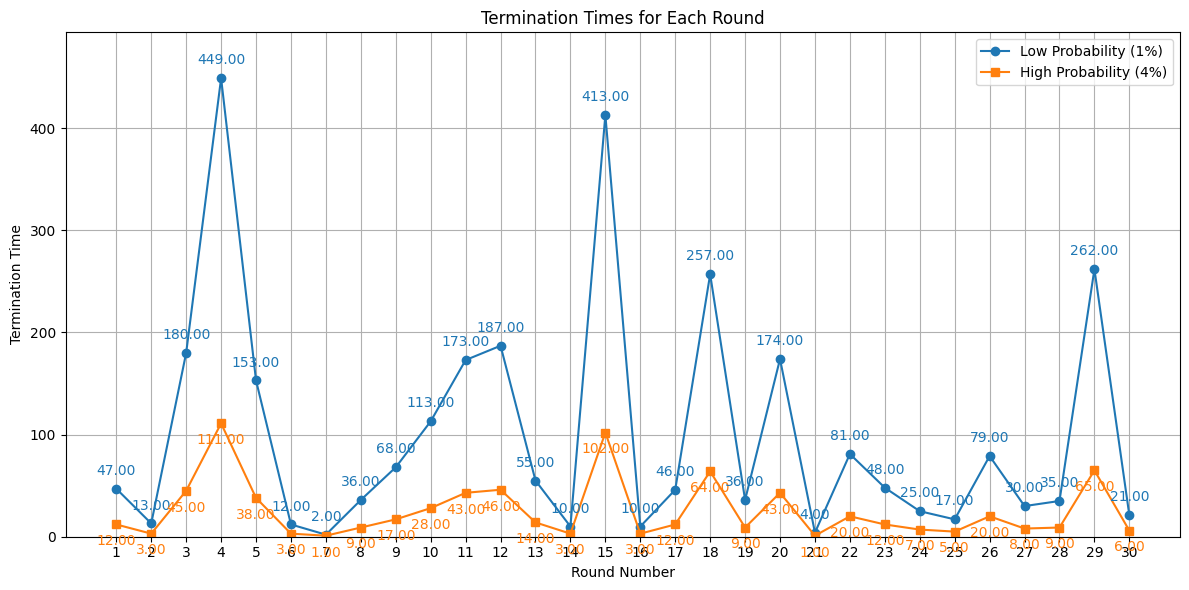

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(termination_times_low_prob) + 1), termination_times_low_prob, marker='o', label='Low Probability (1%)')
plt.plot(range(1, len(termination_times_high_prob) + 1), termination_times_high_prob, marker='s', label='High Probability (4%)')
plt.title('Termination Times for Each Round')
plt.xlabel('Round Number')
plt.ylabel('Termination Time')
plt.grid(True)
plt.xticks(range(1, len(termination_times_low_prob) + 1))
plt.ylim(0, max(max(termination_times_low_prob), max(termination_times_high_prob)) * 1.1)

for i, (txt_low, txt_high) in enumerate(zip(termination_times_low_prob, termination_times_high_prob)):
    plt.annotate(f'{txt_low:.2f}', (i + 1, txt_low), textcoords="offset points", xytext=(0,10), ha='center', color='C0')
    plt.annotate(f'{txt_high:.2f}', (i + 1, txt_high), textcoords="offset points", xytext=(0,-15), ha='center', color='C1')

plt.legend()
plt.tight_layout()
plt.show()

In [4]:
with open(current_dir / "bargain_live" / "randomization_values" / f"termination_times_low_prob.pkl", "wb") as pickle_file:
    pickle.dump(termination_times_low_prob, pickle_file)

with open(current_dir / "bargain_live" / "randomization_values" / f"termination_times_high_prob.pkl", "wb") as pickle_file:
    pickle.dump(termination_times_high_prob, pickle_file)


In [5]:
# Create the four buyer valuations
for i in range(1,5):
    np.random.seed(40 + i)
    globals()[f'buyer_valuations_{i}'] = np.random.randint(0, 61, 30)

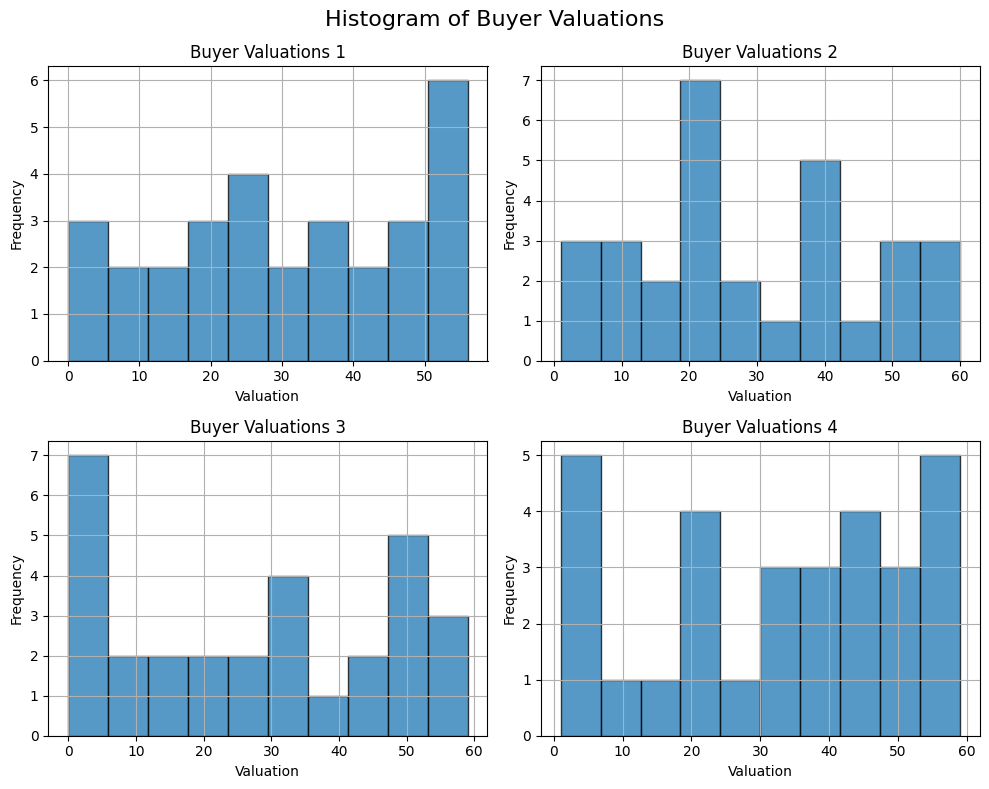

In [6]:
# Create a plot grid for histograms
# Store the valuation vectors in a list
buyer_valuations = [
    buyer_valuations_1,
    buyer_valuations_2,
    buyer_valuations_3,
    buyer_valuations_4
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram of Buyer Valuations', fontsize=16)

# Plot histograms for each buyer valuation vector
for i, ax in enumerate(axes.flat, start=1):
    ax.hist(buyer_valuations[i-1], bins=10, alpha=0.75, edgecolor='black')
    ax.set_title(f'Buyer Valuations {i}')
    ax.set_xlabel('Valuation')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [7]:
np.random.seed(42)

for number_of_groups in [1,2,3,4]:
    participant_data = create_participant_data(number_of_groups, buyer_valuations, number_of_rounds=30)

    group_matrices = create_group_matrices_for_all_rounds(group_dataframe=participant_data, number_of_rounds=30)

    participant_data.to_pickle(current_dir / "bargain_live" /"randomization_values" / f"participant_data_{number_of_groups}_groups.pkl")

    with open(current_dir / "bargain_live" / "randomization_values" / f'round_groupings_{number_of_groups}_groups.pkl', 'wb') as pickle_file:
        pickle.dump(group_matrices, pickle_file)

# Graveyard

In [ ]:
#Initialize Buyer Valuation
buyer_valuations = np.random.randint(0, 101, 100)
plt.hist(buyer_valuations, bins=30)
plt.title("Buyer Valuations")
plt.show()

In [ ]:
for number_of_groups in range(1, 11):
    random_values = create_random_values_dataframe(
        number_of_groups=number_of_groups, 
        buyer_valuations=buyer_valuations
    )
    random_values.to_csv(current_dir / "bargain_live" / "randomization_values" / f"random_values_{number_of_groups}_groups.csv")